# 13.2 MovieLens 1M Dataset

Chuẩn bị thư viện

In [14]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Tổng quan về bộ dữ liệu

Theo file README trong dataset:
- **Nguồn gốc:** Bộ dữ liệu này được cung cấp bởi **GroupLens Research Project** tại Đại học Minnesota.
- **Nội dung:** Chứa 1,000,209 lượt đánh giá phim ẩn danh từ 6,040 người dùng cho khoảng 3,900 bộ phim. Dữ liệu được thu thập từ những người dùng tham gia MovieLens vào năm 2000.
- **Mục đích:** Thường được sử dụng cho nghiên cứu về hệ thống đề xuất (recommender systems), lọc cộng tác (collaborative filtering), và các lĩnh vực liên quan.
- **Cấu trúc:** Dữ liệu được chia thành 3 tệp chính: ratings.dat, users.dat, và movies.dat.

In [2]:
unames = ["user_id", "gender", "age", "occupation", "zip"] # Khai báo tên cột cho bảng users
users = pd.read_table("dataset/movielens/users.dat", sep="::",
                      header=None, names=unames, engine="python") # Đọc dữ liệu từ file users.dat vào DataFrame users

rnames = ["user_id", "movie_id", "rating", "timestamp"] # Khai báo tên cột cho bảng ratings
ratings = pd.read_table("dataset/movielens/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python") # Đọc dữ liệu từ file ratings.dat vào DataFrame ratings

mnames = ["movie_id", "title", "genres"] # Khai báo tên cột cho bảng movies
movies = pd.read_table("dataset/movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python") # Đọc dữ liệu từ file movies.dat vào DataFrame movies

In [3]:
# hiển thị bảng thông tin người dùng 5 dòng đầu tiên
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip         6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


- **users.dat**:
    + Mục đích: Chứa thông tin nhân khẩu học của người dùng.
    + Định dạng: UserID::Gender::Age::Occupation::Zip-code.
    + Các cột:
        - UserID: Mã định danh người dùng.
        - Gender: Giới tính ("M" cho nam, "F" cho nữ).
        - Age: Tuổi, được mã hóa theo các khoảng giá trị (ví dụ: 1: Dưới 18, 18: 18-24, ...).
        - Occupation: Nghề nghiệp, được mã hóa bằng số (ví dụ: 0: Khác/Không xác định, 1: Học thuật/Giáo dục, ..., 20: Nhà văn).
        - Zip-code: Mã zip.
    + Ghi chú: Thông tin nhân khẩu học được người dùng cung cấp tự nguyện và không được kiểm tra độ chính xác. Chỉ những người dùng cung cấp thông tin này mới được đưa vào bộ dữ liệu.

In [6]:
# hiển thị 5 dòng đầu tiên của bảng đánh giá phim
ratings.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


- **ratings.dat**:
    + Mục đích: Chứa thông tin về các lượt đánh giá phim của người dùng.
    + Định dạng: UserID::MovieID::Rating::Timestamp.
    + Các cột:
        - UserID: Mã định danh người dùng (từ 1 đến 6040).
        - MovieID: Mã định danh phim (từ 1 đến 3952).
        - Rating: Điểm đánh giá theo thang điểm 5 sao (chỉ có các giá trị nguyên: 1, 2, 3, 4, 5).
        - Timestamp: Dấu thời gian Unix (số giây kể từ epoch) khi lượt đánh giá được thực hiện.
        - Ghi chú: Mỗi người dùng có ít nhất 20 lượt đánh giá

In [5]:
# hiển thị 5 dòng đầu tiên của bảng thông tin phim
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


- **movies.dat**:
    + Mục đích: Chứa thông tin về các bộ phim.
    + Định dạng: MovieID::Title::Genres.
    + Các cột:
        - MovieID: Mã định danh phim.
        - Title: Tiêu đề phim (giống với IMDB, bao gồm năm phát hành trong dấu ngoặc đơn).
        - Genres: Thể loại phim, được phân tách bằng dấu gạch đứng | (ví dụ: Action|Adventure|Sci-Fi). Có một danh sách các thể loại xác định trước (Action, Adventure, - - - - Animation,...).
    + Ghi chú: Một số MovieID có thể không tương ứng với phim nào do nhập liệu trùng lặp hoặc mục nhập thử nghiệm. Dữ liệu phim chủ yếu được nhập thủ công, có thể tồn tại lỗi và sự không nhất quán.

> Đánh giá chất lượng dữ liệu và các vấn đề tiềm ẩn
- Tính đầy đủ:
    + Dữ liệu người dùng chỉ bao gồm những người đã cung cấp thông tin nhân khẩu học. Điều này có thể gây ra sai lệch (bias) nếu nhóm người dùng không cung cấp thông tin có hành vi đánh giá khác biệt.
- Tính chính xác:
    + Thông tin nhân khẩu học không được xác minh.
    + Thông tin phim (tiêu đề, thể loại) có thể chứa lỗi do nhập liệu thủ công.
- Tính nhất quán:
    + Định dạng các tệp có vẻ nhất quán với dấu phân cách ::.
    + Cách mã hóa tuổi và nghề nghiệp cần được sử dụng đúng khi phân tích.
    + Thể loại phim được phân tách bằng |, cần xử lý khi phân tích (tách thành nhiều cột hoặc xử lý dưới dạng danh sách).

> Lưu ý rằng tuổi và nghề nghiệp được mã hóa dưới dạng số nguyên

- Việc phân tích dữ liệu nằm rải rác trên ba bảng không phải là một nhiệm vụ đơn giản.
- Ví dụ, nếu bạn muốn tính điểm đánh giá trung bình của một bộ phim theo giới tính và độ tuổi, thì sẽ thuận tiện hơn nếu gộp tất cả dữ liệu thành một bảng duy nhất.
- Dựa vào thông tin từ 3 file ta thấy:
    + User_Id và Movie_Id là hai mã định danh, duy nhất nên ta có thể xem nó như là khóa chính của 2 tập data đó
    + Với bảng ratings ta có cả 2 cột User_Id và Movie_Id cho thấy mối quan hệ giữa Users và Movies là quan hệ nhiều - nhiều. Từ đó sẽ sinh ra 1 bảng con để thể hiện rõ ràng hơn. Đó là ratings. Vậy nên chúng ta có thể gom nhóm cả 3 tập dữ liệu này lại thành 1 với ý nghĩa: Một người dùng có thể đánh giá xếp hạng nhiều movie và 1 movie có thể được xếp hạng bởi nhiều người dùng.
> Để thực hiện việc gom nhóm, Ta sử dụng hàm `merge` của pandas, trước tiên chúng ta gộp bảng ratings với bảng users, sau đó gộp kết quả này với bảng movies.
    - pandas sẽ tự suy ra cột nào để dùng làm khóa gộp (merge/join) dựa trên các tên cột trùng nhau.

In [4]:
data = pd.merge(pd.merge(ratings, users), movies)

# hiển thị toàn bộ dữ liệu đã gộp
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [5]:
# hiển thị hàng đầu tiên của dữ liệu đã gộp
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

- Để tính điểm đánh giá trung bình của mỗi bộ phim theo giới tính, chúng ta có thể sử dụng phương thức pivot_table:

## Yếu tố ảnh hưởng đến độ phân tán điểm đánh giá?

- Để xác định yếu tố nào ảnh hưởng đáng kể, chúng ta sẽ tính độ lệch chuẩn (σ) của ratings cho mỗi movie_id, sau đó phân tích σ này theo từng yếu tố:
    + Năm phát hành (Release Year): Chúng ta sẽ trích xuất thông tin năm phát hành của movie bằng cách tách phần trong ngoặc tròn của Title **One Flew Over the Cuckoo's Nest (1975)** vào cột mới có tên là release_year
    + Sau đó tiến hành group by rating theo nhóm với release_year để tính trung bình. 
- Khi nói “ảnh hưởng đến mức độ phân tán”, ta đang hỏi:
    + Liệu giá trị trung bình và độ biến thiên của biến số có khác nhau giữa các nhóm phân loại hay không?.
    + Tiến hành trực quan số liệu để nhận xét và đánh giá. 

### Năm phát hành

In [6]:
# 1. Trích xuất năm phát hành từ tiêu đề phim
# Sử dụng biểu thức chính quy để tìm năm trong dấu ngoặc ở cuối tiêu đề
data['release_year'] = data['title'].str.extract(r'\((\d{4})\)$', expand=False)
# Chuyển đổi cột 'release_year' sang kiểu số, xử lý lỗi bằng cách thay thế giá trị không thể chuyển đổi thành NaN
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

In [7]:
avg_rating_by_year = data.groupby("release_year")["rating"].mean().reset_index()
avg_rating_by_year.head()

,release_year,rating
0,1919,3.466667
1,1920,3.666667
2,1921,3.790323
3,1922,3.991597
4,1923,3.117647


In [8]:
stats_by_year = (
    data.groupby("release_year")["rating"]
        .agg(['count', 'mean', 'std', 'min', 'max'])
        .reset_index()
)
stats_by_year.head()


,release_year,count,mean,std,min,max
0,1919,45,3.466667,1.035725,1,5
1,1920,24,3.666667,1.307725,1,5
2,1921,62,3.790323,1.073329,1,5
3,1922,238,3.991597,1.098490,1,5
4,1923,17,3.117647,1.495090,1,5


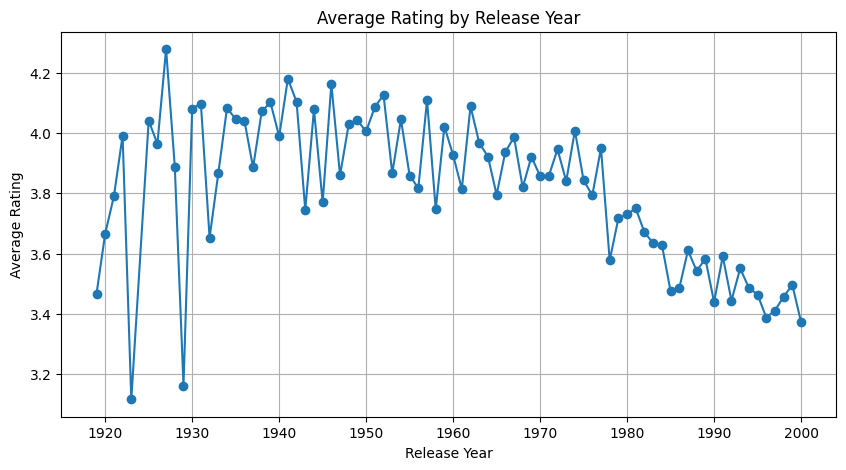

In [9]:
plt.figure(figsize=(10,5))
plt.plot(stats_by_year["release_year"], stats_by_year["mean"], marker="o")
plt.title("Average Rating by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

- Nhận xét:
    + Quan sát biểu đồ trung bình Rating theo năm cho thấy, giai đoạn 1919–1935 có sự dao động mạnh về điểm đánh giá, với đỉnh khoảng năm 1927 (trên 4.2 sao) và đáy năm 1929 (khoảng 3.1 sao). Sự biến động này nhiều khả năng do ngành điện ảnh còn sơ khai, lượt tiếp cận chưa phổ biến và số lượng phim phát hành mỗi năm thấp, khiến trung bình dễ dao động.
    + Từ năm 1935 trở đi, mức trung bình Rating dần ổn định trong khoảng 3.7–4.1, phản ánh sự trưởng thành của ngành điện ảnh và mức độ đồng đều hơn trong chất lượng phim. Tuy nhiên, kể từ sau 1975, trung bình Rating có xu hướng giảm nhẹ đến năm 2000, có thể do sự gia tăng mạnh về số lượng phim hoặc thay đổi trong tiêu chuẩn đánh giá của khán giả.

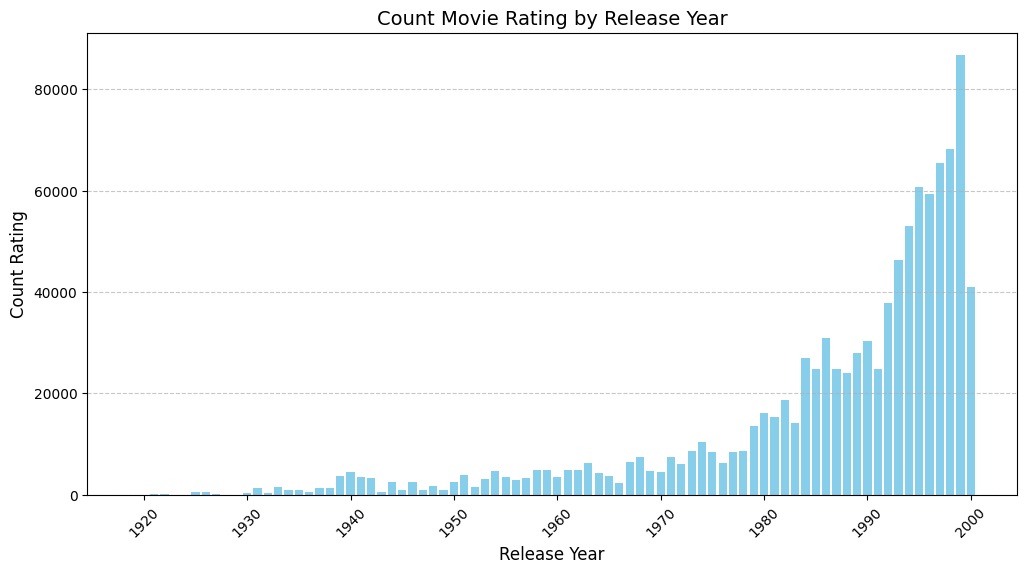

In [12]:
plt.figure(figsize=(12,6))  # Kích thước biểu đồ
plt.bar(stats_by_year["release_year"], stats_by_year["count"], color='skyblue')

plt.title("Count Movie Rating by Release Year", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Count Rating", fontsize=12)
plt.xticks(rotation=45)  # Xoay nhãn năm cho dễ đọc
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

- Quan sát biểu đồ số lượng ratings theo năm, ta thấy:
    + Trước 1930: số lượng phim và lượt đánh giá cực ít → dao động trung bình rating lớn là hệ quả tự nhiên (sai số mẫu cao).
    + Sau 1960: lượng dữ liệu tăng mạnh → trung bình rating trở nên ổn định hơn, phản ánh khách quan hơn xu hướng thực tế của thị trường điện ảnh.
> Biểu đồ số lượng rating theo năm cho thấy sự khác biệt rõ giữa hai giai đoạn của ngành điện ảnh. Từ 1919 đến khoảng 1940, số lượng phim và lượt đánh giá rất thấp, dẫn đến giá trị trung bình rating biến động mạnh do cỡ mẫu nhỏ. Bước sang giai đoạn 1960–2000, số lượng rating tăng nhanh và ổn định hơn, phản ánh sự mở rộng của thị trường điện ảnh và tính khách quan cao hơn trong dữ liệu. Do đó, khi phân tích xu hướng đánh giá theo năm, cần tập trung vào giai đoạn sau 1960 để đảm bảo ý nghĩa thống kê và đại diện cho toàn bộ ngành.

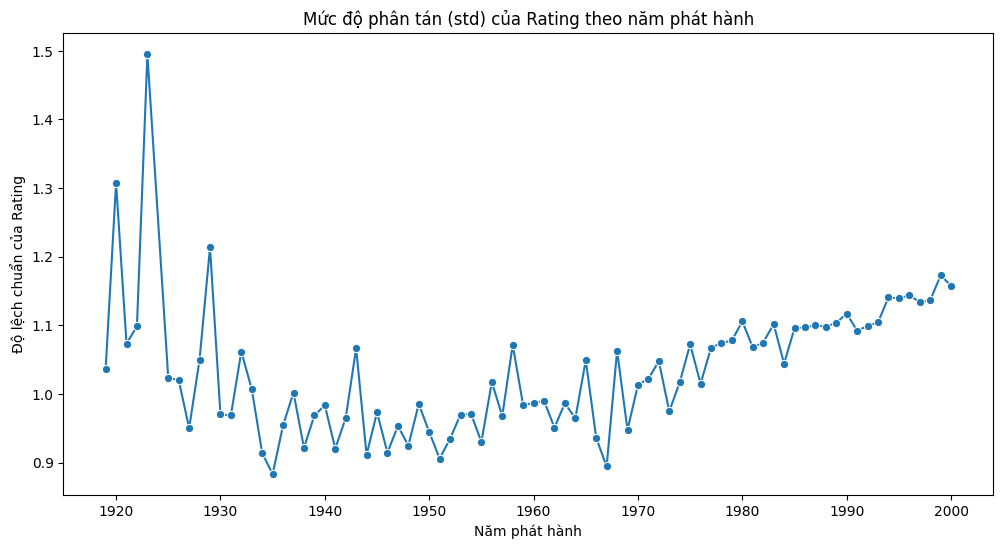

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(x="release_year", y="std", data=stats_by_year, marker="o")
plt.title("Mức độ phân tán (std) của Rating theo năm phát hành")
plt.xlabel("Năm phát hành")
plt.ylabel("Độ lệch chuẩn của Rating")
plt.show()

- Độ lệch chuẩn của 1 vài năm đầu khá cao nhưng sao đó dần ổn định trở lại và có xu hướng tăng từ 1970 đến năm 2000

- Kết luận:
    + Dựa vào tổng số lượng Rating và sự phân bố cao của độ lệch chuẩn trước năm 1940 cho thấy ngành điện ảnh còn mới và lượng tiếp cận còn hạn chế. Sau đó độ lệch chuẩn đã giảm và có xu hướng tăng dần cùng với số lượng Rating đỉnh điêm là hơn 800000 những năm gần 2000. 
    + Điều này chứng tỏ rằng năm phát hành ảnh hưởng đáng kể đến mức độ phân tán của rating, đặc biệt ở giai đoạn đầu thế kỷ XX khi ngành điện ảnh còn non trẻ, và giảm dần khi thị trường trở nên ổn định hơn.

### Thể loại

In [19]:
movies["genres"].head()

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genres, dtype: object

In [20]:
movies["genres"].head().str.split("|")

0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: genres, dtype: object

In [21]:
# tách cột thể loại theo dấu '|'
df_genre = data.assign(genre=data['genres'].str.split('|')).explode('genre')
df_genre = df_genre.dropna(subset=['genre'])
df_genre.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,release_year,genre
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,1996,Animation
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,1996,Children's
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,1996,Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance,1964,Musical


In [22]:
stats_by_genre = (
    df_genre.groupby("genre")["rating"]
    .agg(['count', 'mean', 'std'])
    .sort_values(by="count", ascending=False)
)
stats_by_genre.head(10)


,count,mean,std
genre,,,
Comedy,356580,3.522099,1.120726
Drama,354529,3.766332,1.045784
Action,257457,3.491185,1.133471
Thriller,189680,3.570466,1.106643
Sci-Fi,157294,3.466521,1.157239
Romance,147523,3.607465,1.066755
Adventure,133953,3.477257,1.129464
Crime,79541,3.708679,1.077740
Horror,76386,3.215013,1.225531


In [24]:
# chọn top thể loại phổ biến (ví dụ có trên 500 phim)
popular_genres = stats_by_genre[stats_by_genre["count"] > 500].index

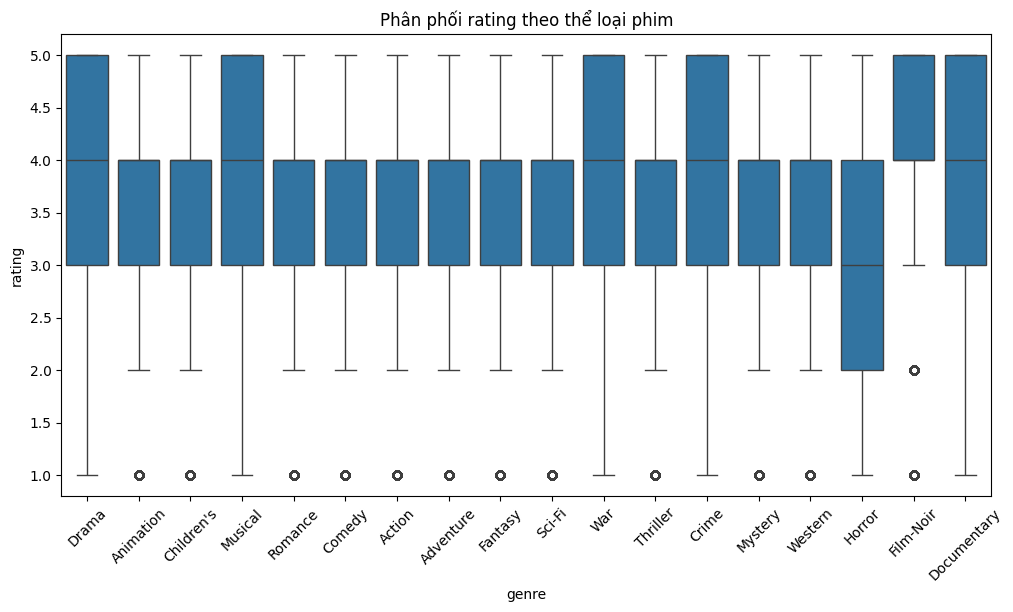

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_genre[df_genre['genre'].isin(popular_genres)],
            x="genre", y="rating")
plt.xticks(rotation=45)
plt.title("Phân phối rating theo thể loại phim")
plt.show()


- Mô tả biểu đồ boxplot: 
    + Phần lớn thể loại có median rating khoảng 3.5–4.0, cho thấy xu hướng khán giả đánh giá khá tích cực.
    + Một vài thể loại như Drama, Musical, Film-Noir có median cao hơn một chút → khán giả có vẻ đánh giá tích cực hơn.
    + Thể loại Horror có median thấp nhất, và hộp trải rộng → rating dao động lớn, có nhiều phim được đánh giá rất thấp hoặc rất cao (tức là ý kiến khán giả chia rẽ hơn).
    + Các outlier xuất hiện rải rác ở hầu hết thể loại, cho thấy có những phim “cực đỉnh” hoặc “cực tệ” trong từng nhóm.
> Mặc dù trung vị rating giữa các thể loại khá tương đồng, nhưng mức độ phân tán và sự xuất hiện của ngoại lệ (outlier) khác nhau đáng kể — cho thấy trải nghiệm khán giả đối với từng thể loại không đồng nhất hoàn toàn.

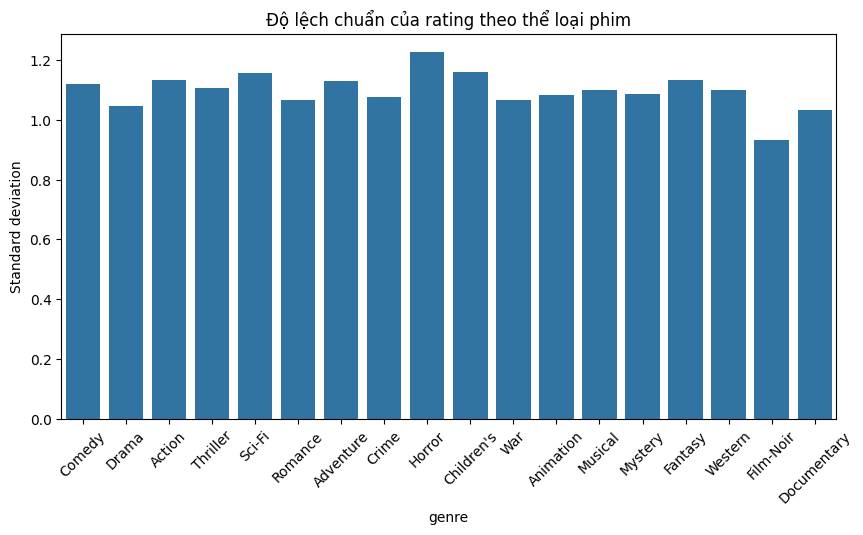

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x=stats_by_genre.index, y=stats_by_genre['std'])
plt.xticks(rotation=45)
plt.title("Độ lệch chuẩn của rating theo thể loại phim")
plt.ylabel("Standard deviation")
plt.show()


- Quan sát và nhận xét:
    + Độ lệch chuẩn của các thể loại dao động quanh 1.0–1.2, tức là khá tương đồng nhau, chứng tỏ nhìn chung khán giả có mức độ đa dạng trong đánh giá tương tự nhau giữa các thể loại.
    + Tuy nhiên, thể loại Horror (1.23) có độ lệch chuẩn cao nhất → thể hiện ý kiến người xem chia rẽ nhất, có người thích cực, có người chê mạnh.
    + Ngược lại, Film-Noir (≈0.93) có độ lệch chuẩn thấp nhất → khán giả đánh giá khá thống nhất hơn.
> Độ lệch chuẩn rating giữa các thể loại phim nhìn chung khá tương đồng, cho thấy hầu hết thể loại đều thu hút lượng khán giả đa dạng với sự đánh giá trải rộng. Tuy nhiên, thể loại Horror có độ biến động cao nhất, phản ánh sự phân hóa mạnh trong cảm nhận của người xem, trong khi Film-Noir có xu hướng được đánh giá thống nhất hơn.

### Giới tính

In [27]:
# tạo bảng pivot để tính điểm trung bình (mean) theo tiêu đề phim và giới tính
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


- Điều này đã tạo ra một DataFrame khác chứa điểm đánh giá trung bình, với tên phim làm nhãn hàng (index) và giới tính làm nhãn cột.
- Trước tiên, cần lọc ra các bộ phim nhận được ít nhất 250 lượt đánh giá (số này mang tính tùy ý).
    - Để làm điều này, tôi nhóm dữ liệu theo cột title và dùng size() để lấy một Series cho biết kích thước của mỗi nhóm (tức số lượt đánh giá của từng phim):

In [29]:
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

- Chỉ số (index) của các bộ phim nhận được ít nhất 250 lượt đánh giá sau đó có thể được sử dụng để chọn các hàng tương ứng từ `mean_ratings` bằng cách dùng `.loc`:

In [30]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [31]:
mean_ratings = mean_ratings.rename(index={"Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)":
                           "Seven Samurai (Shichinin no samurai) (1954)"})

- Để xem các bộ phim được nữ khán giả đánh giá cao nhất, chúng ta có thể sắp xếp theo cột `F` (giới tính nữ) theo thứ tự giảm dần:

In [32]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [33]:
top_female_ratings[['F', 'M']].describe()


gender,F,M
count,1216.000000,1216.000000
mean,3.548584,3.541090
std,0.508329,0.513287
min,1.574468,1.616949
25%,3.243709,3.208182
50%,3.604564,3.605161
75%,3.924150,3.913895
max,4.644444,4.583333


## Đo lường sự khác biệt về đánh giá

- Giả sử bạn muốn tìm những bộ phim mà có sự khác biệt lớn về đánh giá giữa nam và nữ.
    - Một cách làm là:
        - Thêm một cột vào `mean_ratings` chứa hiệu số trung bình giữa hai giới tính.
        - Sắp xếp theo cột này để tìm các bộ phim có sự khác biệt lớn nhất:

In [ ]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

- Sắp xếp theo cột `diff` sẽ cho ra những bộ phim có sự khác biệt điểm đánh giá lớn nhất, giúp chúng ta xem phim nào được nữ khán giả yêu thích hơn.

In [ ]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


- Đảo ngược thứ tự các hàng và lấy 10 hàng đầu một lần nữa, ta sẽ có danh sách các bộ phim được nam khán giả yêu thích nhưng nữ khán giả không đánh giá cao.

In [ ]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


- Giả sử khi muốn tìm những bộ phim gây ra nhiều tranh cãi nhất trong số các khán giả, bất kể giới tính.
- Sự khác biệt (disagreement) có thể được đo bằng phương sai (variance) hoặc độ lệch chuẩn (standard deviation) của các lượt đánh giá.
- Để làm điều này, trước tiên ta tính độ lệch chuẩn của điểm đánh giá theo từng phim (title), sau đó lọc ra các phim hoạt động nhiều (có đủ lượt đánh giá):

In [ ]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

- Sau đó, chúng ta sắp xếp theo thứ tự giảm dần và chọn 10 hàng đầu, tương đương với 10 bộ phim có sự khác biệt về đánh giá lớn nhất.

In [ ]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

- Có thể nhận thấy rằng thể loại phim (genres) được lưu dưới dạng chuỗi ký tự ngăn cách bằng dấu gạch dọc `|`, vì một bộ phim có thể thuộc nhiều thể loại khác nhau.
- Để giúp nhóm dữ liệu đánh giá theo thể loại, chúng ta có thể sử dụng phương thức `explode` của DataFrame.
- Trước tiên, hãy xem cách hoạt động của nó:
      - Chúng ta tách chuỗi thể loại (genres) thành danh sách các thể loại riêng biệt bằng cách dùng phương thức `str.split` trên Series.

In [ ]:
movies["genres"].head()

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genres, dtype: object

In [ ]:
movies["genres"].head().str.split("|")

0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: genres, dtype: object

In [ ]:
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


- Bây giờ, khi gọi `movies.explode("genre")`, ta sẽ tạo ra một DataFrame mới, trong đó mỗi phần tử bên trong danh sách thể loại của một bộ phim sẽ trở thành một hàng riêng biệt.
- Ví dụ: nếu một bộ phim được xếp vào cả hai thể loại "Hài (Comedy)" và "Lãng mạn (Romance)", thì trong kết quả sẽ có hai hàng:
    - Một hàng chứa “Comedy”,
    - Và một hàng chứa “Romance”.

In [ ]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


- Bây giờ, chúng ta có thể gộp cả ba bảng dữ liệu lại với nhau và nhóm dữ liệu theo thể loại phim (genre).

In [ ]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]

movie_id                     1
title         Toy Story (1995)
genre                Animation
user_id                      1
rating                       5
timestamp            978824268
gender                       F
age                          1
occupation                  10
zip                      48067
Name: 0, dtype: object

In [ ]:
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean()
                 .unstack("age"))
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


In [ ]:
!head -n 10 datasets/babynames/yob1880.txt

'head' is not recognized as an internal or external command,
operable program or batch file.
